# Librerias

In [16]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import zipfile

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

Valores: predicciones negativos, no tenia sentido. Se puede modelar el logaritmo

Ausencia de predictores: si es negativo, medias anteriores

sistema determinista en el que se asume unas condiciones de proceso dan un determinado resultado no como serie temporal de la variable respuesta. Proceso dinamico, interesa la P hace x tiempo no la de ahora, en un tramo previo del circuito. El valor de la variable hace 8 horas no influye 


columnas completas, variables correlacionadas, columnas con valores constantes, columnas muy desbalanceadas? combinar grupos minoritarios.
comenzar regresion logistica sin regu
regularizar por correlaciones
random forest, gradient boosting
metricas:
accuracy, F1 score
AUC - ROC



# Datos modelizacion

In [2]:
zip_file = zipfile.ZipFile(r".\Archive.zip")
datos_model_raw = pd.read_csv(zip_file.open("datos_para_modelizacion.csv"))
print(datos_model_raw.shape)
datos_model_raw.head(5)

(96188, 277)


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_267,var_268,var_269,var_270,var_271,var_272,var_273,var_274,var_275,label
0,9248245,0.0,0,0,0.0,0.0,0.00,0.0,0.0,1,...,0.0,1.0,0,0.0,0.0,0,0.0,0,0.0,0
1,10037840,0.0,0,0,0.0,0.0,0.00,0.0,0.0,1,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
2,10299029,0.0,0,0,0.0,0.0,24.44,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
3,10907006,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0
4,14080498,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0


## Análisis descriptivo

In [41]:
datos_model_raw.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_267,var_268,var_269,var_270,var_271,var_272,var_273,var_274,var_275,label
count,9.618800e+04,96188.000000,96188.000000,96188.000000,96188.0,96188.000000,96188.000000,96188.000000,96188.000000,96188.000000,...,96188.000000,96188.000000,96188.000000,96188.000000,96188.000000,96188.0,96188.000000,96188.000000,96188.000000,96188.000000
mean,6.508026e+08,0.001985,0.009752,0.001071,0.0,0.000335,2.934996,0.000245,0.035151,0.206211,...,0.000602,0.759627,0.000073,0.031579,0.375511,0.0,0.000218,0.000042,0.005895,0.036314
std,7.305800e+08,0.232712,0.099947,0.032706,0.0,0.103920,14.669620,0.075933,2.553340,0.404586,...,0.131917,4.216230,0.008531,1.012583,4.675368,0.0,0.039093,0.006449,0.488573,0.187072
min,3.937070e+05,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.268936e+08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,3.657658e+08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,6.240783e+08,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,3.140207e+09,27.280000,3.000000,1.000000,0.0,32.230000,222.680000,23.550000,337.120000,1.000000,...,28.930000,442.000000,1.000000,112.500000,220.810000,0.0,7.000000,1.000000,40.500000,1.000000


### Valores constantes

Se eliminar columnas con valores constantes

In [68]:
datos_model = datos_model_raw.copy()

# Numero de columnas con valores constantes
def valor_constante(col):
    col = col.to_numpy()
    return (col[0] == col).all()

cols_constantes = []

for col in datos_model.columns:
    if valor_constante(datos_model[col]):
        cols_constantes.append(col)
        
print("Número de columnas con valores constantes: ", len(cols_constantes))
print(cols_constantes)

Número de columnas con valores constantes:  36
['var_4', 'var_11', 'var_22', 'var_24', 'var_28', 'var_31', 'var_50', 'var_55', 'var_58', 'var_61', 'var_65', 'var_70', 'var_78', 'var_84', 'var_91', 'var_113', 'var_114', 'var_125', 'var_127', 'var_147', 'var_154', 'var_158', 'var_169', 'var_182', 'var_190', 'var_193', 'var_206', 'var_214', 'var_217', 'var_221', 'var_225', 'var_233', 'var_251', 'var_256', 'var_265', 'var_272']


In [69]:
datos_model = datos_model_raw.drop(cols_constantes, axis=1)
datos_model.head()

,var_0,var_1,var_2,var_3,var_5,var_6,var_7,var_8,var_9,var_10,...,var_266,var_267,var_268,var_269,var_270,var_271,var_273,var_274,var_275,label
0,9248245,0.0,0,0,0.0,0.00,0.0,0.0,1,0.0,...,0.0,0.0,1.0,0,0.0,0.0,0.0,0,0.0,0
1,10037840,0.0,0,0,0.0,0.00,0.0,0.0,1,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
2,10299029,0.0,0,0,0.0,24.44,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
3,10907006,0.0,0,0,0.0,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0
4,14080498,0.0,0,0,0.0,0.00,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0


### NaNs

Columnas con algún missing value

In [70]:
# Columnas con número NaN >= 1
def is_nan(df_col):
    if df_col.isna().sum() >=1:
        x = True
    else:
        x = False
    return x

cols_with_nan = {}

for col in datos_model.columns:
    if is_nan(datos_model[col]):
        cols_with_nan[col] = datos_model[col].isna().sum()
        
print("Número de columnas con algún Nan: ", len(cols_with_nan))
print(cols_with_nan)

Número de columnas con algún Nan:  1
{'var_174': 19642}


In [71]:
print(datos_model["var_174"].describe())
datos_model["var_174"].unique()

count           76546
unique              3
top       CONVERGENTE
freq            36653
Name: var_174, dtype: object


array(['HIPERCONVERGENTE', 'CONVERGENTE', nan, 'RESTO'], dtype=object)

Se completa la var_174 añadiendo los Nan a la categoría RESTO, lo ideal sería hablarlo con negocio

In [72]:
datos_model["var_174"] = datos_model["var_174"].fillna(value="RESTO")

In [73]:
print(datos_model["var_174"].isna().sum())
print(datos_model["var_174"].unique())

0
['HIPERCONVERGENTE' 'CONVERGENTE' 'RESTO']


### Duplicates

In [74]:
# Filas duplicadas

datos_model.duplicated().sum()

0

In [75]:
# Columnas duplicadas

datos_model.T.duplicated().sum()

0

### No numéricas

Se comprueban si existen y los valores de las columnas no numéricas

In [76]:
# Columnas no numéricas
df_no_num = datos_model.select_dtypes(exclude=["float64", "int64"])
df_no_num

,var_105,var_174,var_213
0,antiguedad_0_6,HIPERCONVERGENTE,asignacion_NLMPYME_Low
1,antiguedad_12_18,CONVERGENTE,asignacion_NLMPYME_Low
2,antiguedad_36_72,CONVERGENTE,asignacion_NLMPYME_Low
3,antiguedad_6_12,CONVERGENTE,asignacion_NLMPYME_Low
4,antiguedad_gt_120,RESTO,asignacion_NLMPYME_Low
...,...,...,...
96183,antiguedad_gt_120,CONVERGENTE,asignacion_NLMPYME_Legacy_Ono
96184,antiguedad_0_6,CONVERGENTE,asignacion_NLMPYME_Low
96185,antiguedad_gt_120,RESTO,asignacion_NLMPYME_Legacy_Ono
96186,antiguedad_24_36,CONVERGENTE,asignacion_NLMPYME_Legacy_Ono


In [77]:
print(datos_model["var_105"].describe())
datos_model["var_105"].unique()

count               96188
unique                  8
top       antiguedad_6_12
freq                22255
Name: var_105, dtype: object


array(['antiguedad_0_6', 'antiguedad_12_18', 'antiguedad_36_72',
       'antiguedad_6_12', 'antiguedad_gt_120', 'antiguedad_24_36',
       'antiguedad_18_24', 'antiguedad_72_120'], dtype=object)

In [78]:
print(datos_model["var_213"].describe())
datos_model["var_213"].unique()

count                      96188
unique                         2
top       asignacion_NLMPYME_Low
freq                       66332
Name: var_213, dtype: object


array(['asignacion_NLMPYME_Low', 'asignacion_NLMPYME_Legacy_Ono'],
      dtype=object)

### Numéricas

In [79]:
# Correlación entre columnas numéricas

corr_mat = datos_model.select_dtypes(include=["float64", "int64"]).corr(method='pearson')

In [92]:
def tidy_corr_matrix(corr_mat):
    '''
    Convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['var_1','var_2','r']
    corr_mat = corr_mat.loc[corr_mat['var_1'] != corr_mat['var_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_mat = tidy_corr_matrix(corr_mat)
tidy_corr_mat.head(5)

,var_1,var_2,r,abs_r
36813,var_179,var_187,1.0,1.0
38348,var_187,var_36,1.0,1.0
38472,var_187,var_179,1.0,1.0
7301,var_36,var_187,1.0,1.0
5028,var_25,var_36,1.0,1.0


In [134]:
print(datos_model["var_179"].value_counts())
print(datos_model["var_187"].value_counts())

0.0     96187
20.0        1
Name: var_179, dtype: int64
0.0     96187
30.0        1
Name: var_187, dtype: int64


Columnas con prácticamente todos los valores constantes

In [140]:
print("95% diferente al resto, número valores diferentes en col ", 96187 - 0.95*96187)
print("99% diferente al resto, número valores diferentes en col ", 96187 - 0.99*96187)
print("99,9% diferente al resto, número valores diferentes en col ", 96187 - 0.999*96187)
print("99,99% diferente al resto, número valores diferentes en col ", 96187 - 0.9999*96187)

95% diferente al resto, número valores diferentes en col  4809.350000000006
99% diferente al resto, número valores diferentes en col  961.8699999999953
99,9% diferente al resto, número valores diferentes en col  96.18700000000536
99,99% diferente al resto, número valores diferentes en col  9.618699999991804


In [137]:
# Numero de columnas con valores constantes
def porcentaje_constante(col):
    counts = col.value_counts().sort_values(ascending=False)
    porc = counts.to_numpy()[0] / col.shape[0]
    
    return porc

porc_constantes = []

for col in datos_model.select_dtypes(include=["float64", "int64"]):
    if porcentaje_constante(datos_model[col]) >= 0.999:
        porc_constantes.append(col)
        
print("Número de columnas con valores constantes: ", len(porc_constantes))
print(porc_constantes)

Número de columnas con valores constantes:  122
['var_1', 'var_5', 'var_7', 'var_8', 'var_10', 'var_12', 'var_14', 'var_15', 'var_16', 'var_17', 'var_19', 'var_20', 'var_21', 'var_25', 'var_26', 'var_27', 'var_30', 'var_33', 'var_34', 'var_35', 'var_36', 'var_40', 'var_46', 'var_47', 'var_51', 'var_52', 'var_53', 'var_60', 'var_62', 'var_64', 'var_66', 'var_67', 'var_72', 'var_74', 'var_77', 'var_79', 'var_85', 'var_86', 'var_89', 'var_90', 'var_95', 'var_102', 'var_106', 'var_109', 'var_110', 'var_111', 'var_112', 'var_115', 'var_116', 'var_118', 'var_119', 'var_121', 'var_123', 'var_128', 'var_132', 'var_133', 'var_135', 'var_136', 'var_138', 'var_141', 'var_142', 'var_143', 'var_145', 'var_149', 'var_150', 'var_151', 'var_155', 'var_156', 'var_157', 'var_160', 'var_163', 'var_164', 'var_167', 'var_168', 'var_175', 'var_176', 'var_178', 'var_179', 'var_180', 'var_181', 'var_186', 'var_187', 'var_188', 'var_189', 'var_191', 'var_198', 'var_199', 'var_200', 'var_202', 'var_203', 'var_2

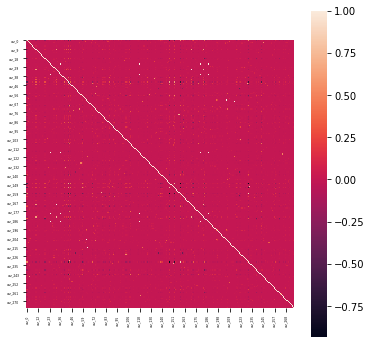

In [81]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

sns.heatmap(
    corr_mat,
    square    = True,
    ax        = ax
)

ax.tick_params(labelsize = 3)

In [29]:
(df_num["var_179"] == df_num["var_187"]).all()

True

# Datos predicción

In [13]:
zip_file = zipfile.ZipFile(r".\Archive.zip")
datos_pred = pd.read_csv(zip_file.open("datos_para_prediccion.csv"))

In [14]:
datos_pred

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_266,var_267,var_268,var_269,var_270,var_271,var_272,var_273,var_274,var_275
0,9248245,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
1,10907006,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
2,14080498,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
3,29764234,0.0,0,0,0.0,0.0,0.0,0.0,0.0,1,...,0.00,0.0,2.0,0,0.0,0.0,0,0.0,0,0.0
4,32791073,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,9.09,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71391,3029101742,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,2.0,0,0.0,0.0,0,0.0,0,0.0
71392,3033578041,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
71393,3035802671,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
71394,3047197511,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.00,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0
